In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from glob import glob
from tqdm import tqdm

import my_module

In [5]:
paths = glob(f"../TestData/*/**")
df_care = pd.DataFrame()
for path in paths:
    tmp = pd.read_csv(path)
    df_care = pd.concat([df_care, tmp])

In [6]:
df_care = my_module.convert_datetime(df_care, ["start", "finish"])
df_care = my_module.add_timeLength_timeLengthSeconds(df_care)
# df_care["time_length_seconds"].hist()

In [ ]:
# drop missing and duplicated data
df_care.dropna(inplace=True)
# datetimeごとにsort
df_care.sort_values("start", inplace=True)

In [7]:
tmp = df_care["year-month-date-hour"].str.split("-", expand=True)
df_care["hour"] = tmp.iloc[:, 3].apply(float)
df_care["month_day"] = tmp.loc[:, 1].str.cat(tmp.iloc[:, 2])

/tmp/ipykernel_283831/3415257653.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


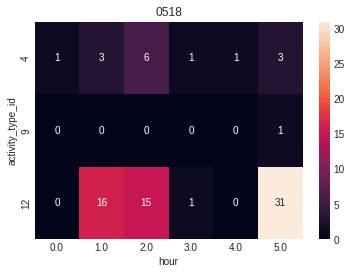

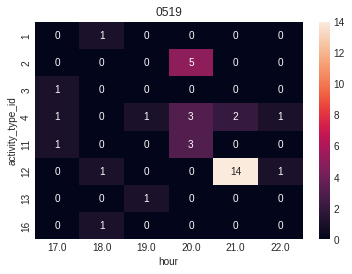

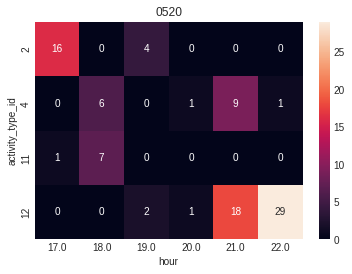

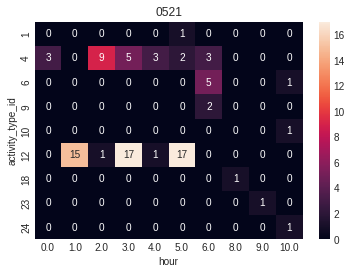

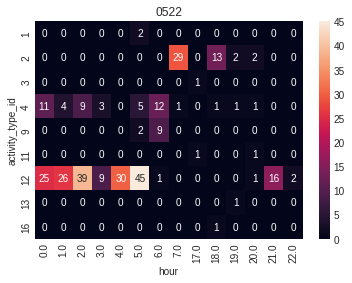

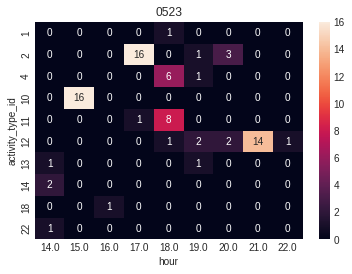

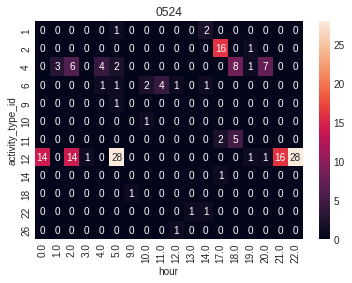

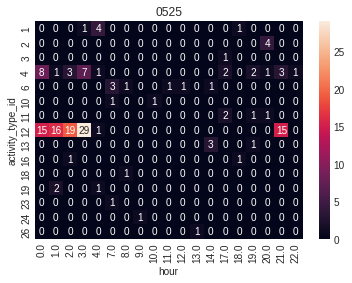

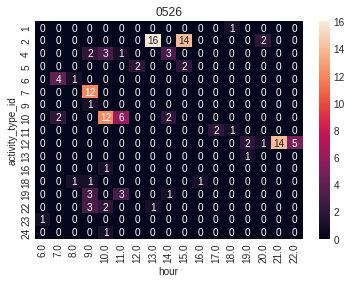

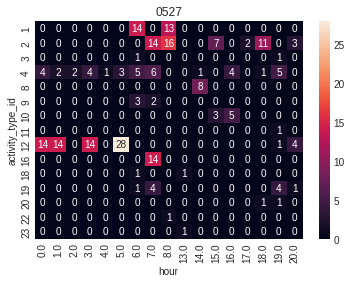

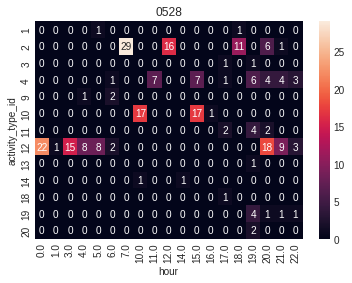

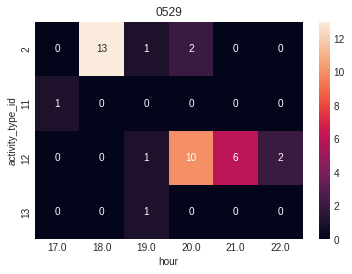

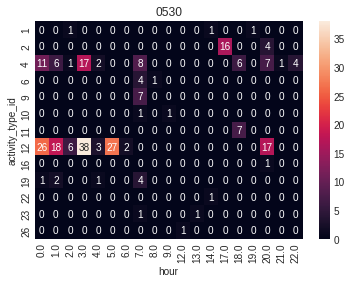

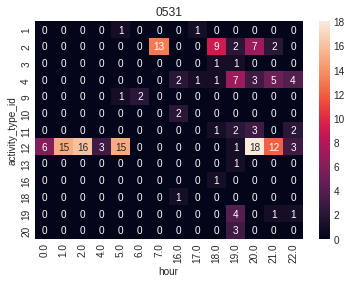

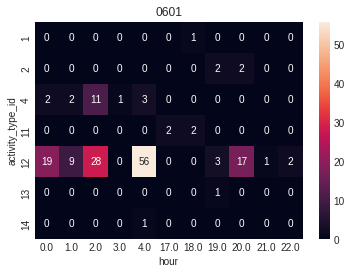

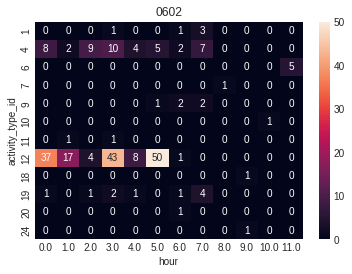

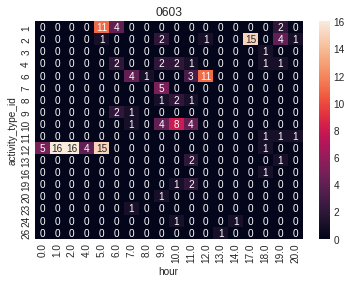

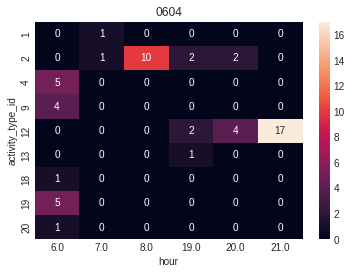

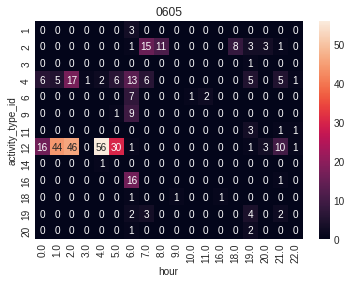

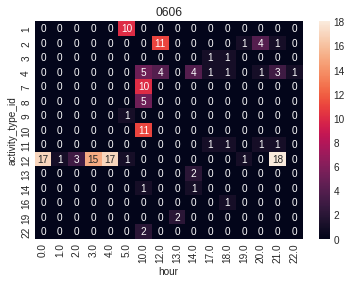

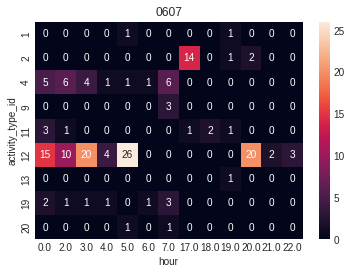

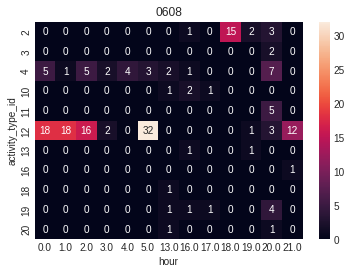

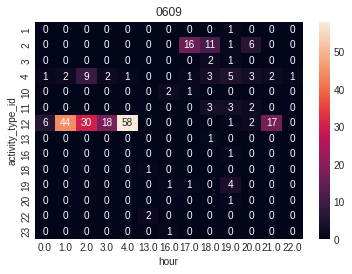

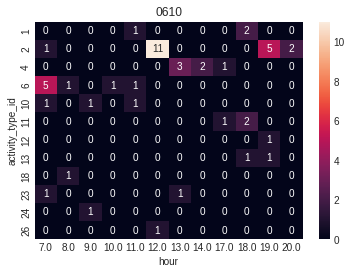

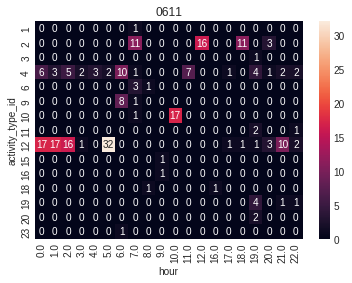

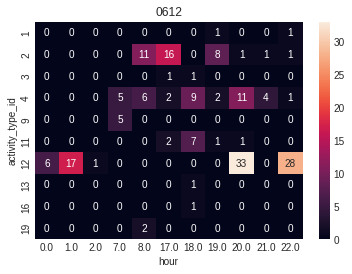

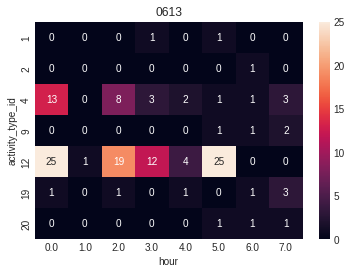

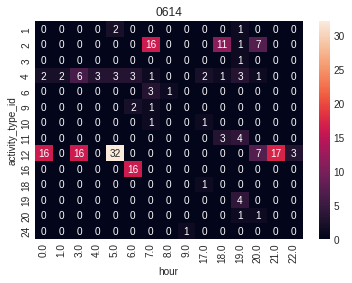

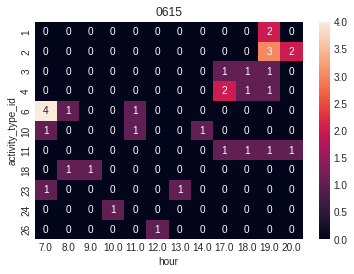

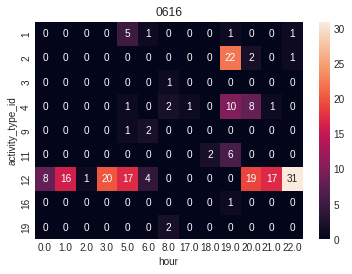

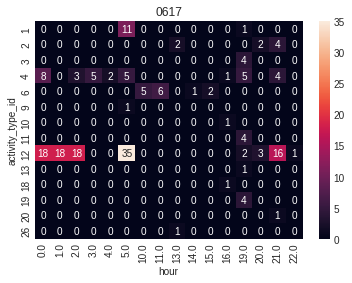

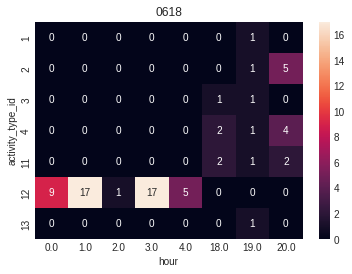

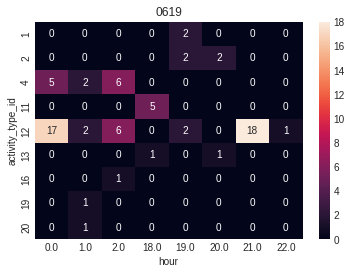

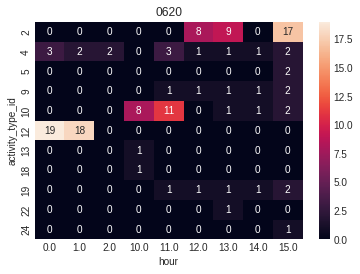

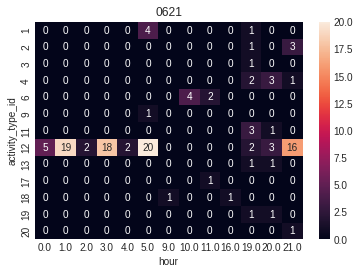

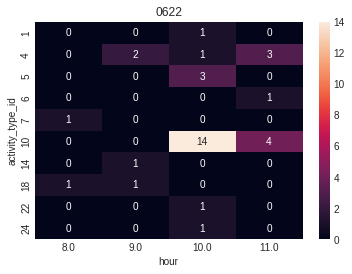

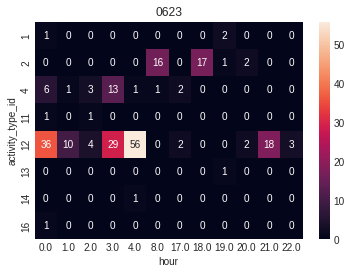

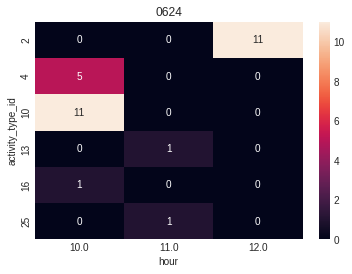

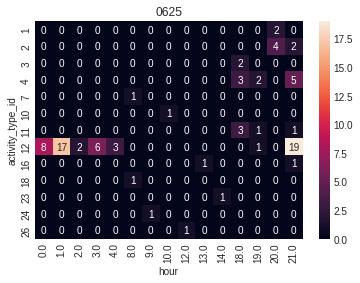

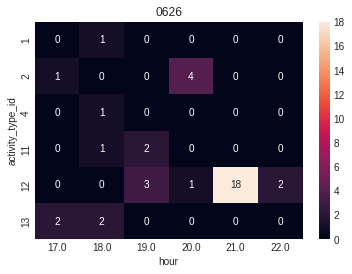

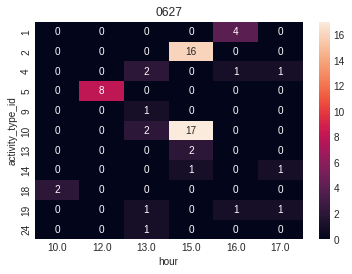

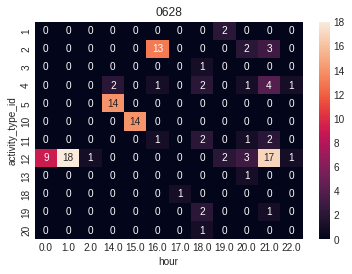

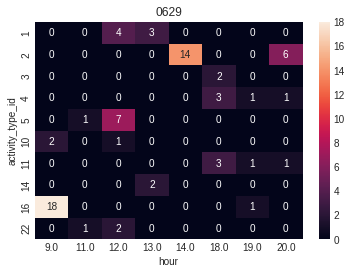

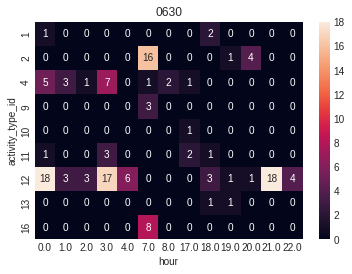

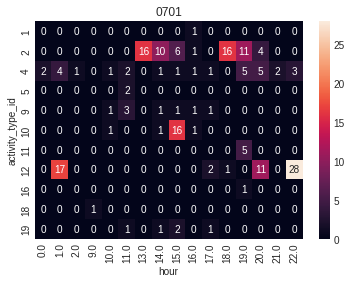

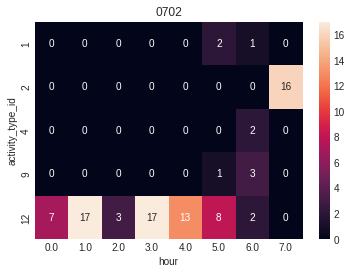

In [13]:
tmp = df_care.groupby(["month_day", "hour", "activity_type_id"], as_index=False).count()
mpl.style.use("seaborn-darkgrid")
for month_day in tmp["month_day"].unique():
    corr = tmp[tmp["month_day"] == month_day].pivot(index="activity_type_id", columns="hour", values="id").fillna(0)
    plt.figure()
    sns.heatmap(corr, annot=True)
    plt.title(month_day)
    plt.savefig(f"../results/test_heatmap/{month_day}.png")

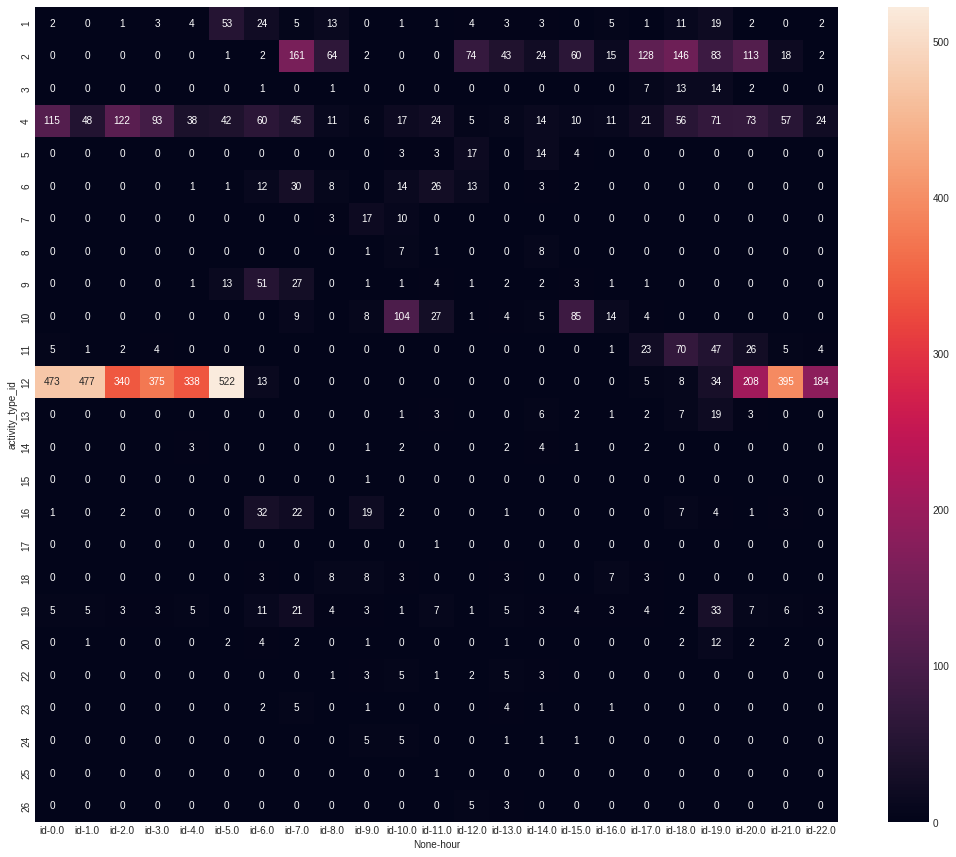

In [6]:
import seaborn as sns
mpl.style.use("seaborn-darkgrid")
df_care["hour"] = df_care["year-month-date-hour"].str.split("-", expand=True).iloc[:, -1].astype(float)
corr = df_care.groupby(["activity_type_id", "hour"]).count().iloc[:, 0].reset_index().sort_values(["activity_type_id", "hour"]).pivot("activity_type_id", "hour").fillna(0).astype(int)
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, fmt='d');
plt.savefig("../results/test/activity_hour_heatmap.png")

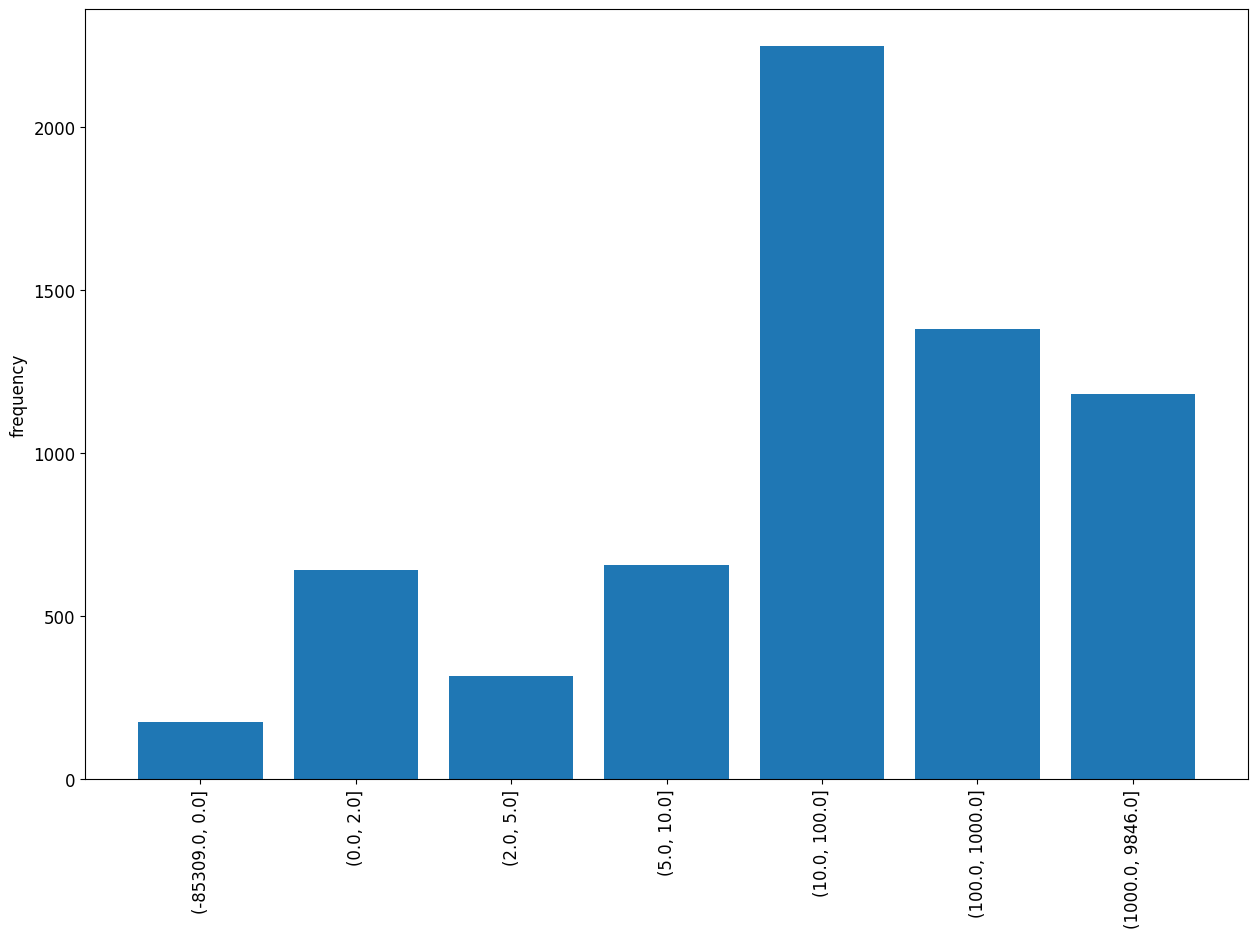

In [9]:
s_cut = pd.cut(df_care["time_length_seconds"], [min(df_care["time_length_seconds"]), 0, 2, 5, 10, 100, 1000, max(df_care["time_length_seconds"])])
data = s_cut.value_counts().sort_index()
mpl.style.use("default")
plt.figure(figsize=(15, 10))
data = s_cut.value_counts().sort_index()
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("frequency", size=12)
plt.bar(data.index.astype(str), data);
plt.savefig("../results/test/test_time_length_frequencty.png")

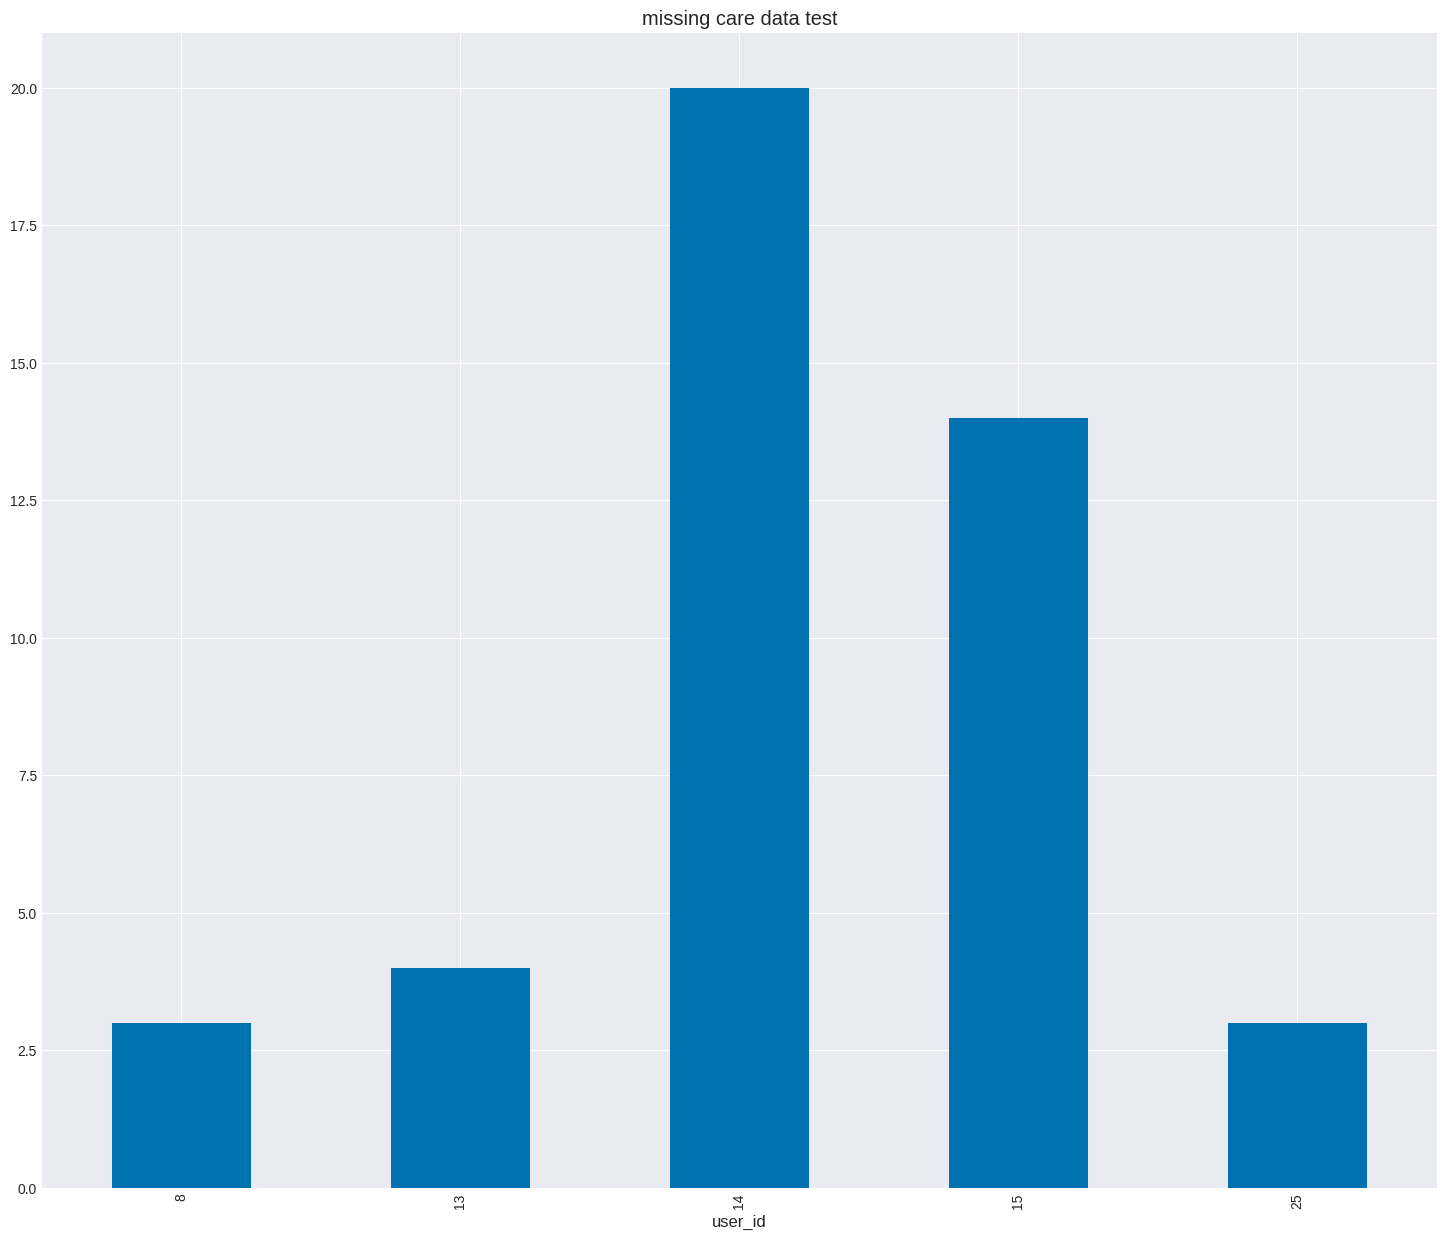

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(18, 15))
plt.title("missing care data test")
df_care.groupby(["user_id"])["finish"].apply(lambda x: x.isnull().sum()).plot(kind="bar", ax=ax)
plt.savefig("../results/test/test_missing_data_test.png")

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour,hour
0,23743,25,26,休憩,25,67465,2018-05-25 13:01:28+09:00,2018-05-25 14:20:54+09:00,2018-05-25-13.0,13.0
1,23155,25,6,処置,49,66131,2018-05-25 07:43:33+09:00,2018-05-25 07:44:06+09:00,2018-05-25-7.0,7.0
2,23154,25,6,処置,60,66130,2018-05-25 07:43:34+09:00,2018-05-25 07:43:54+09:00,2018-05-25-7.0,7.0
3,23156,25,6,処置,50,66132,2018-05-25 07:43:40+09:00,2018-05-25 07:44:12+09:00,2018-05-25-7.0,7.0
4,23160,25,6,処置,85,66136,2018-05-25 08:11:29+09:00,2018-05-25 08:44:39+09:00,2018-05-25-8.0,8.0
...,...,...,...,...,...,...,...,...,...,...
0,21306,25,6,処置,35,62756,2018-05-21 10:52:44+09:00,2018-05-21 10:53:29+09:00,2018-05-21-10.0,10.0
1,21304,25,24,服薬整理,25,62754,2018-05-21 10:23:39+09:00,2018-05-21 10:52:15+09:00,2018-05-21-10.0,10.0
2,21305,25,10,日中利用者対応,25,62755,2018-05-21 10:52:27+09:00,2018-05-21 13:07:16+09:00,2018-05-21-10.0,10.0
3,21303,25,23,物品準備・点検,25,62752,2018-05-21 09:35:44+09:00,2018-05-21 10:23:37+09:00,2018-05-21-9.0,9.0


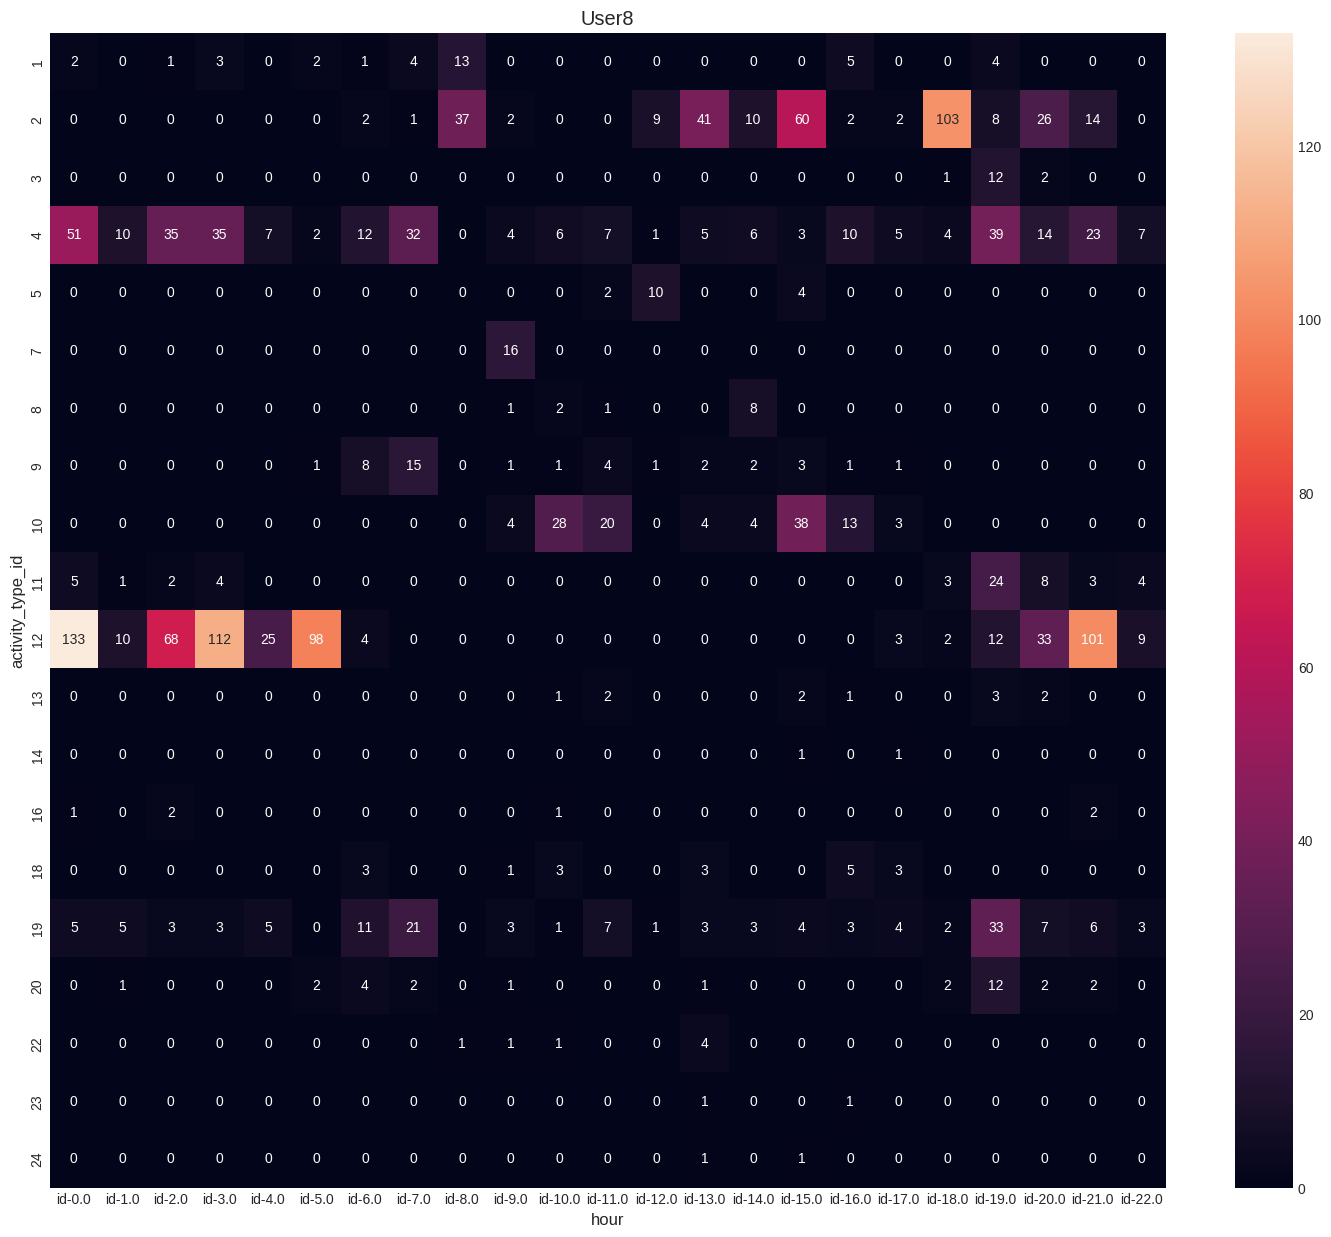

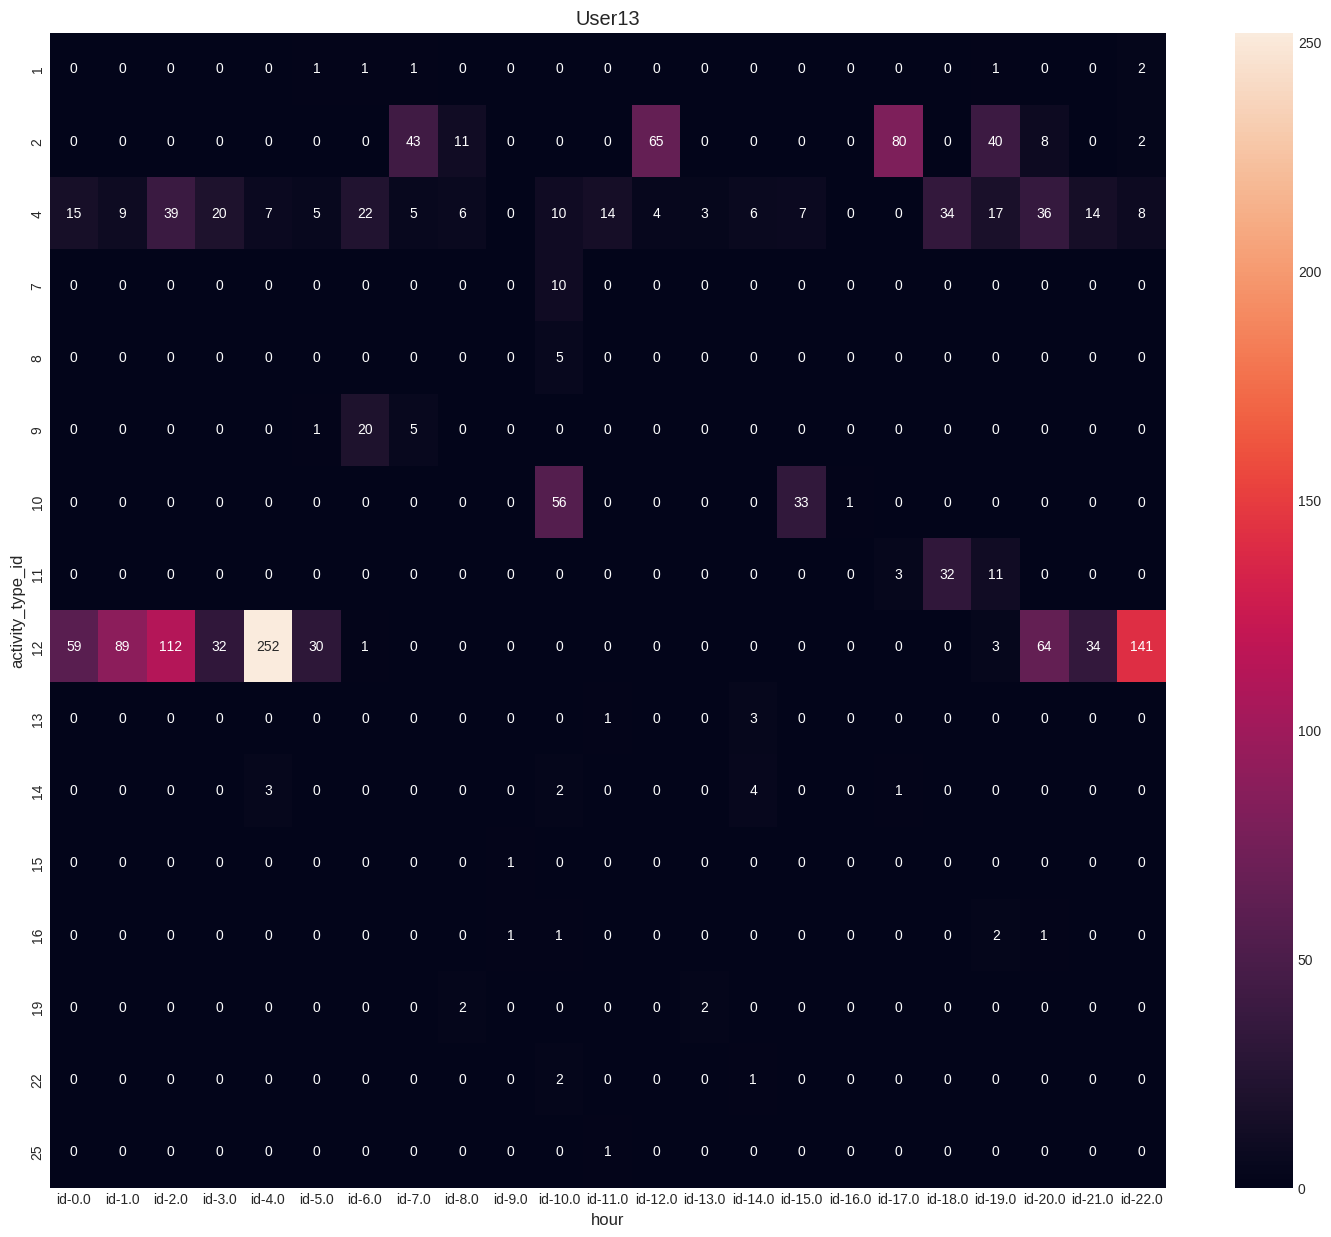

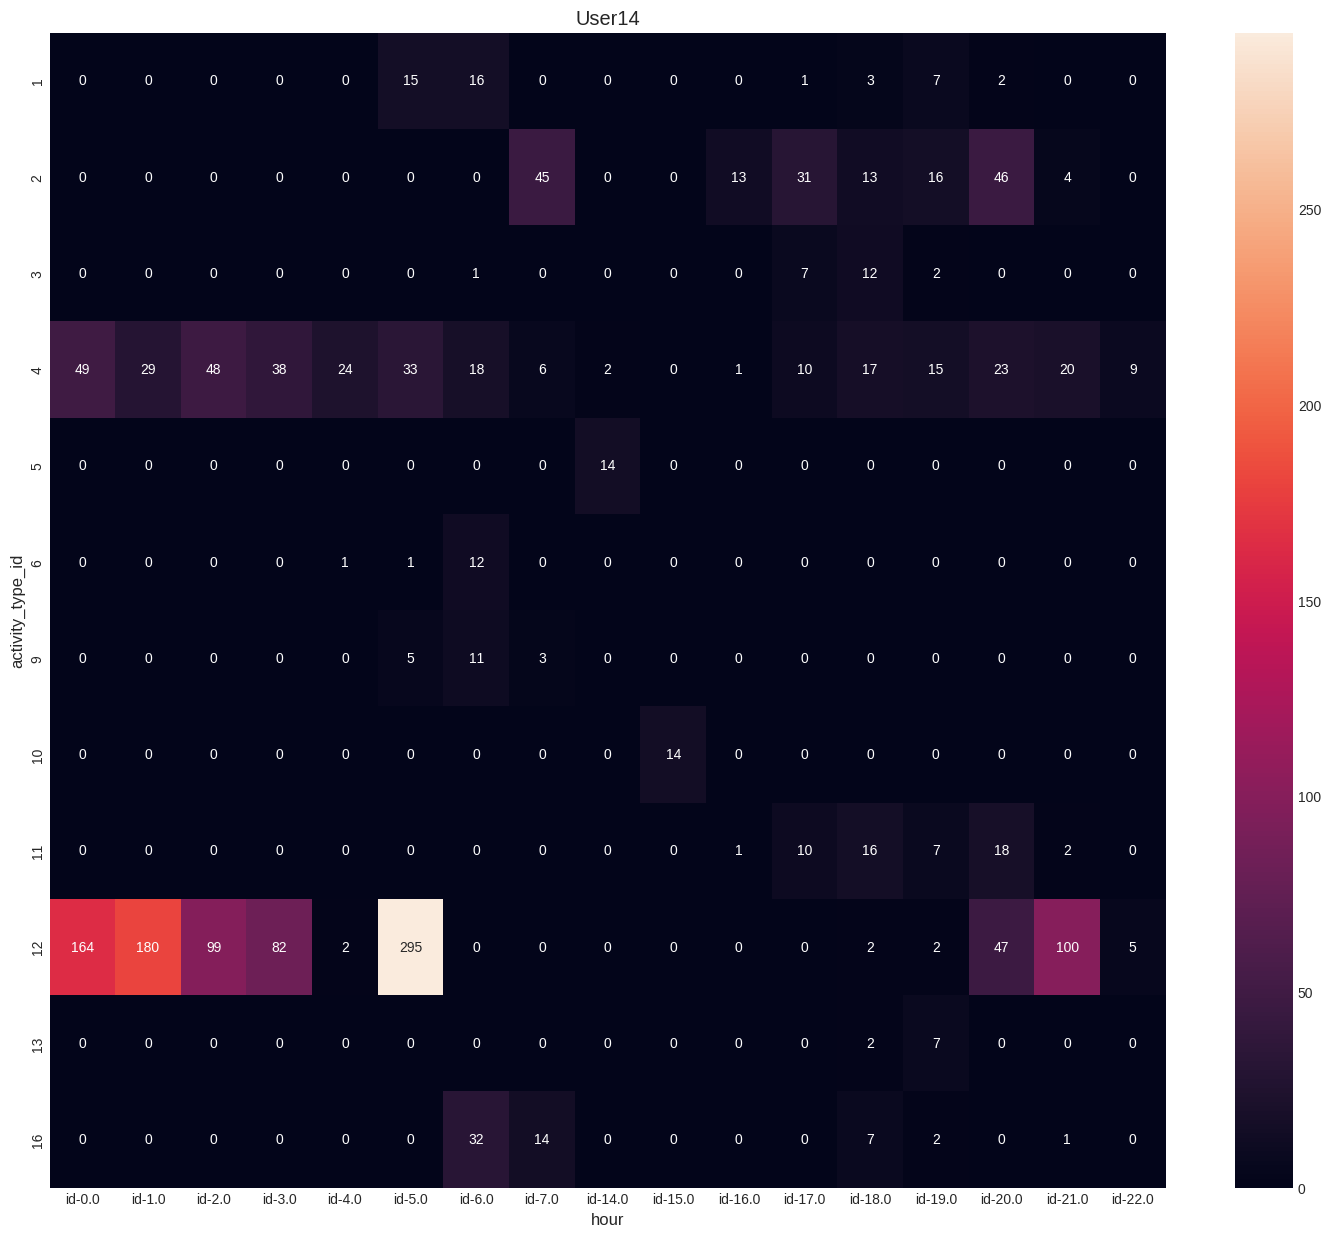

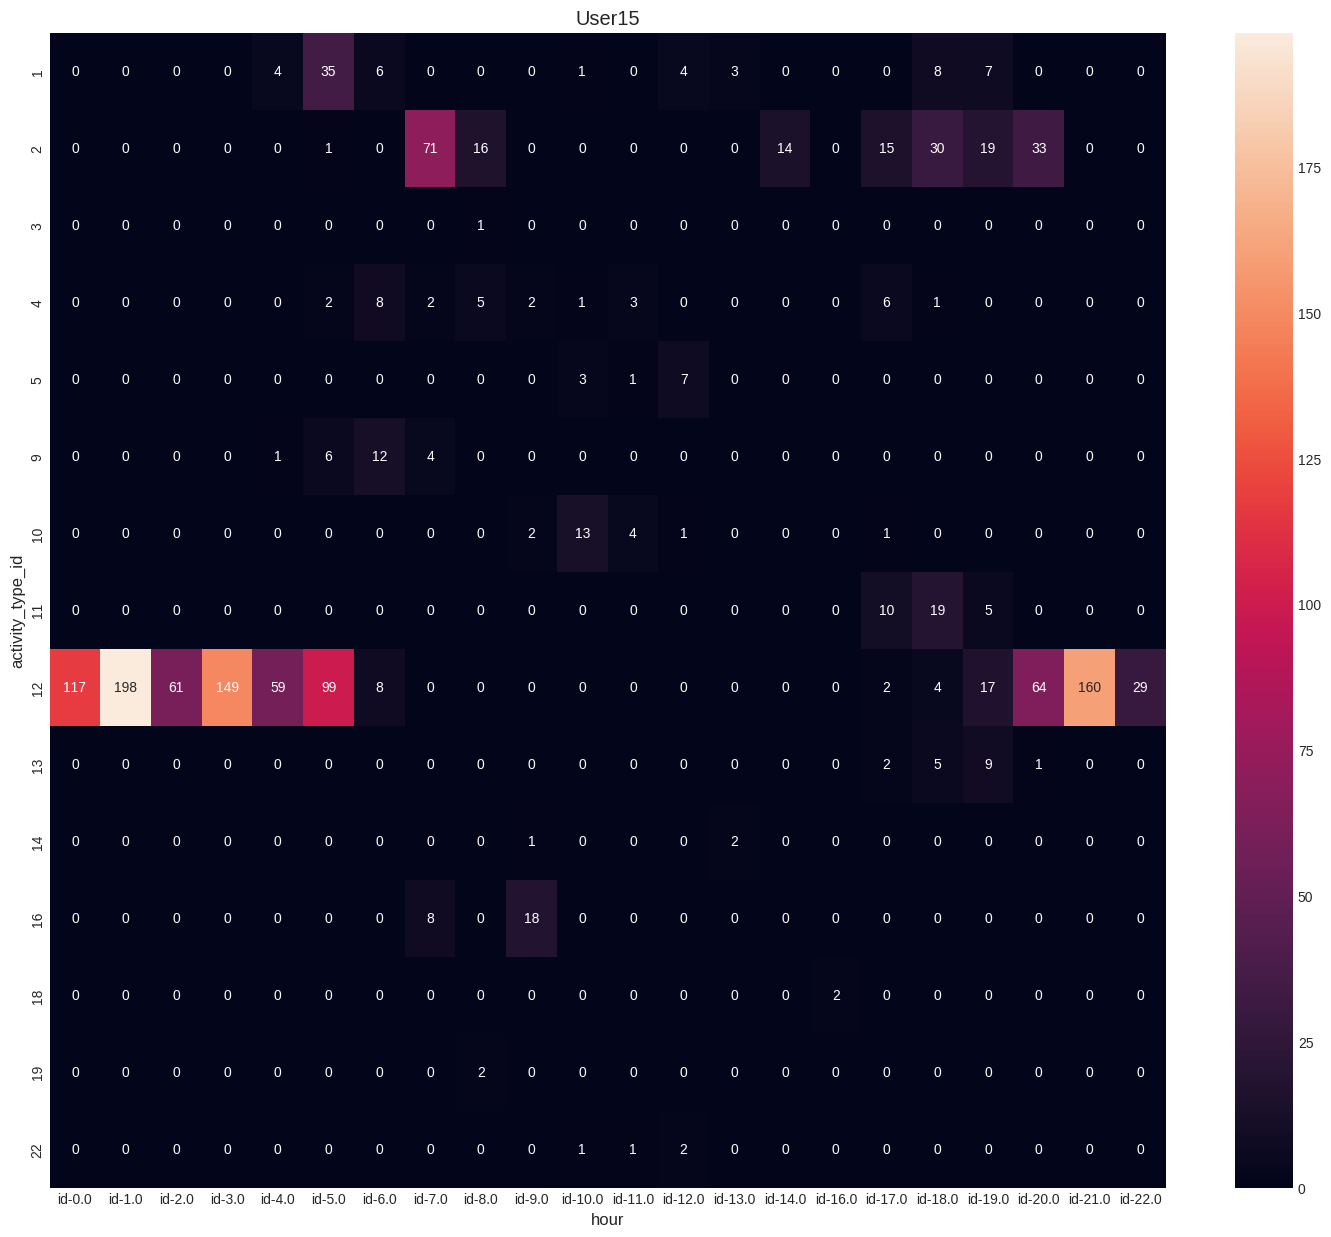

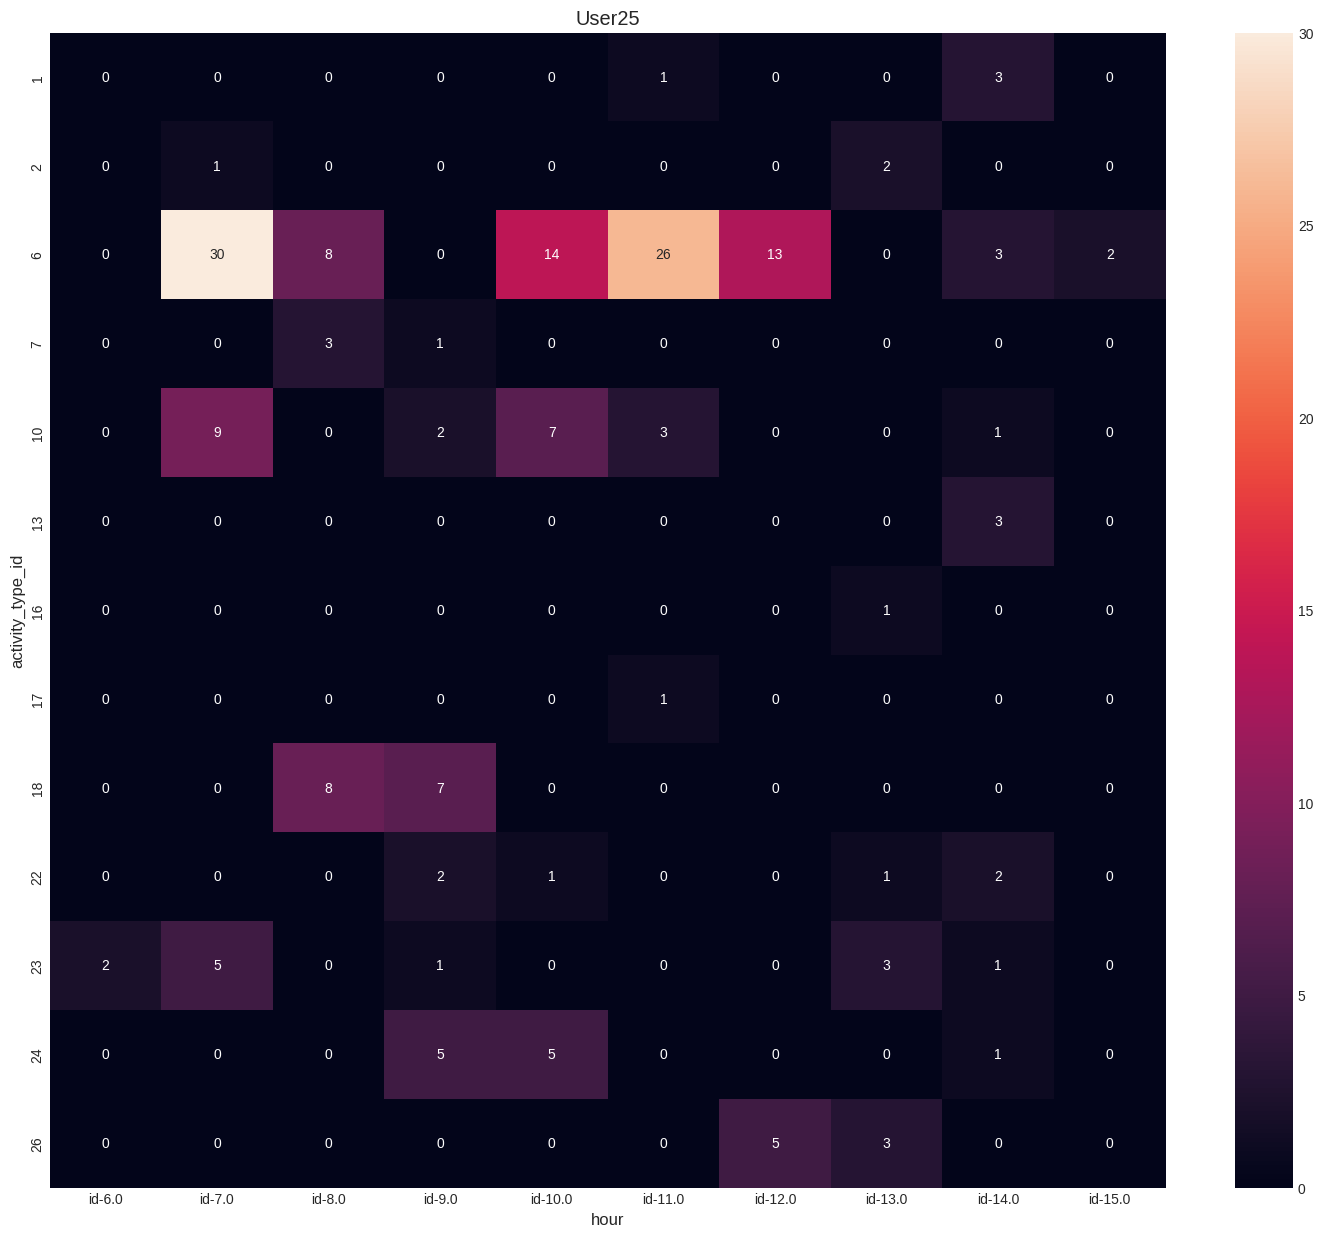

In [48]:
usersID = [8, 13, 14, 15, 25]
for userID in usersID:
    paths = glob(f"../TestData/User{userID}/**")
    df_care = pd.DataFrame()
    for path in paths:
        tmp = pd.read_csv(path)
        df_care = pd.concat([df_care, tmp])
df_care

In [49]:
df_care["hour"].value_counts()

7.0     45
11.0    31
10.0    27
8.0     19
12.0    18
9.0     18
14.0    14
13.0    10
15.0     2
6.0      2
Name: hour, dtype: int64

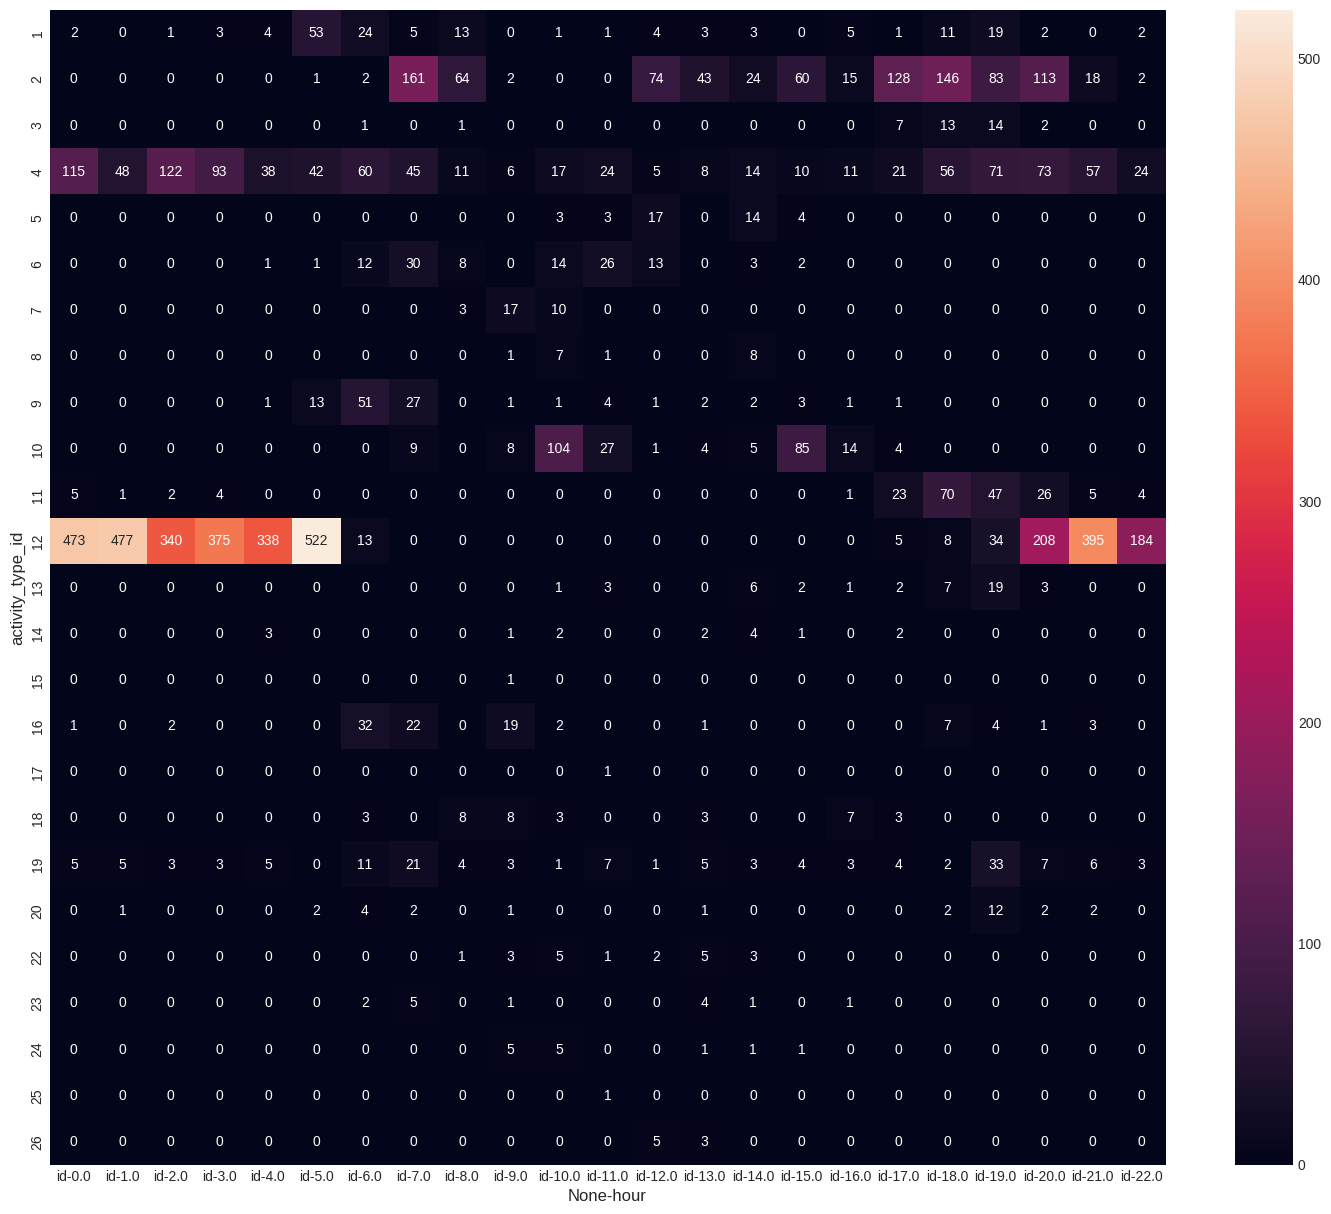

In [45]:
import seaborn as sns
mpl.style.use("seaborn-darkgrid")
df_care["hour"] = df_care["year-month-date-hour"].str.split("-", expand=True).iloc[:, -1].astype(float)
corr = df_care.groupby(["activity_type_id", "hour"]).count().iloc[:, 0].reset_index().sort_values(["activity_type_id", "hour"]).pivot("activity_type_id", "hour").fillna(0).astype(int)
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, fmt='d');
plt.savefig("../results/test/activity_hour_heatmap.png")

<Figure size 640x480 with 0 Axes>

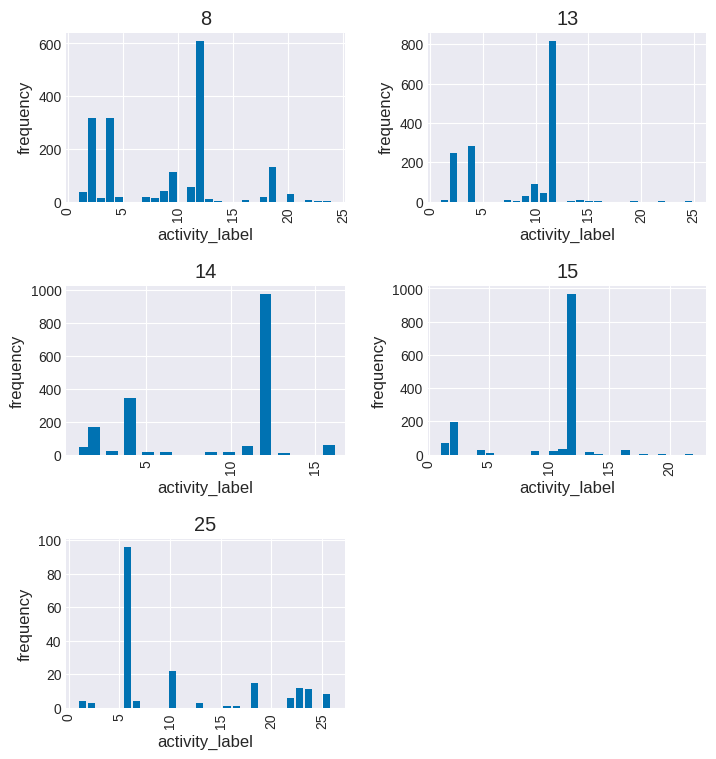

In [66]:
mpl.style.use("seaborn-darkgrid")
fig = plt.figure()
axes = df_care.hist(by="user_id", column="activity_type_id", bins=28, width=0.7, figsize=(8, 9), align="mid");
# set xlabel
axes[0][0].set_xlabel("activity_label")
axes[0][1].set_xlabel("activity_label")
axes[1][0].set_xlabel("activity_label")
axes[1][1].set_xlabel("activity_label")
axes[2][0].set_xlabel("activity_label")

# set ylabel
axes[0][0].set_ylabel("frequency")
axes[0][1].set_ylabel("frequency")
axes[1][0].set_ylabel("frequency")
axes[1][1].set_ylabel("frequency")
axes[2][0].set_ylabel("frequency")
plt.savefig("../results/test/activity_userID_freq.png")

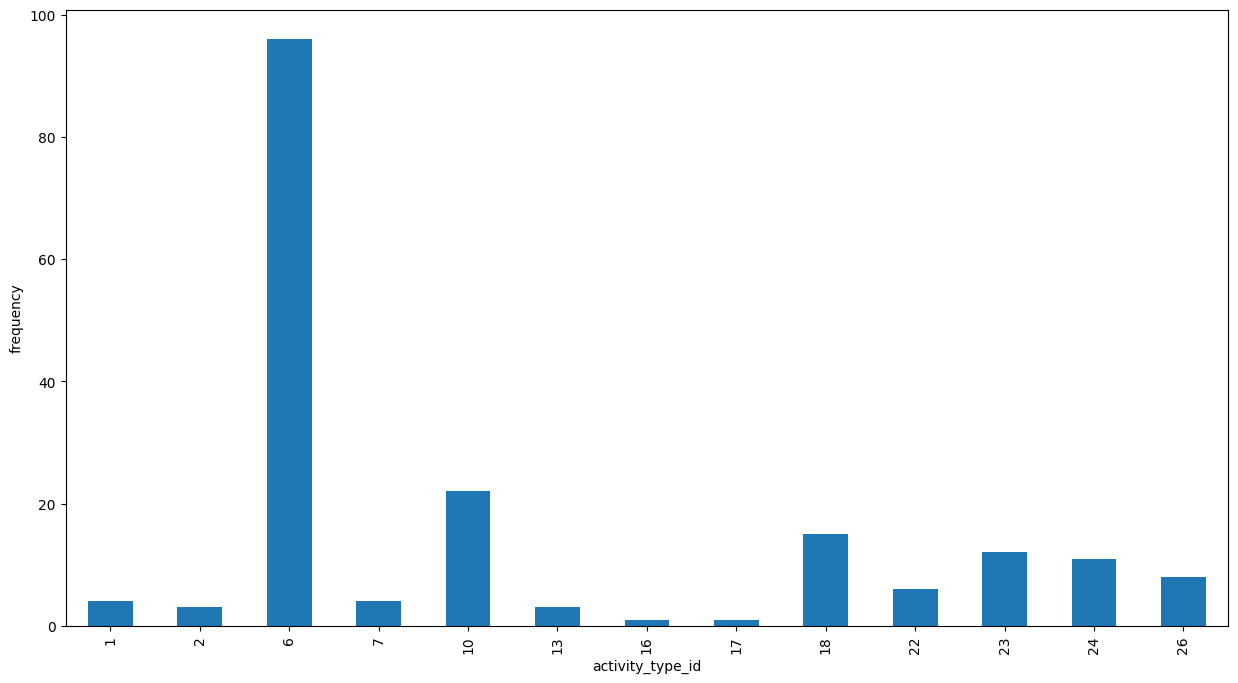

In [23]:
mpl.style.use("default")
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df_care.groupby(["activity_type_id"]).count()["id"].plot(kind="bar", ax=ax);
ax.set_ylabel("frequency")
plt.savefig("../results/test_user25_activity_freq.png")

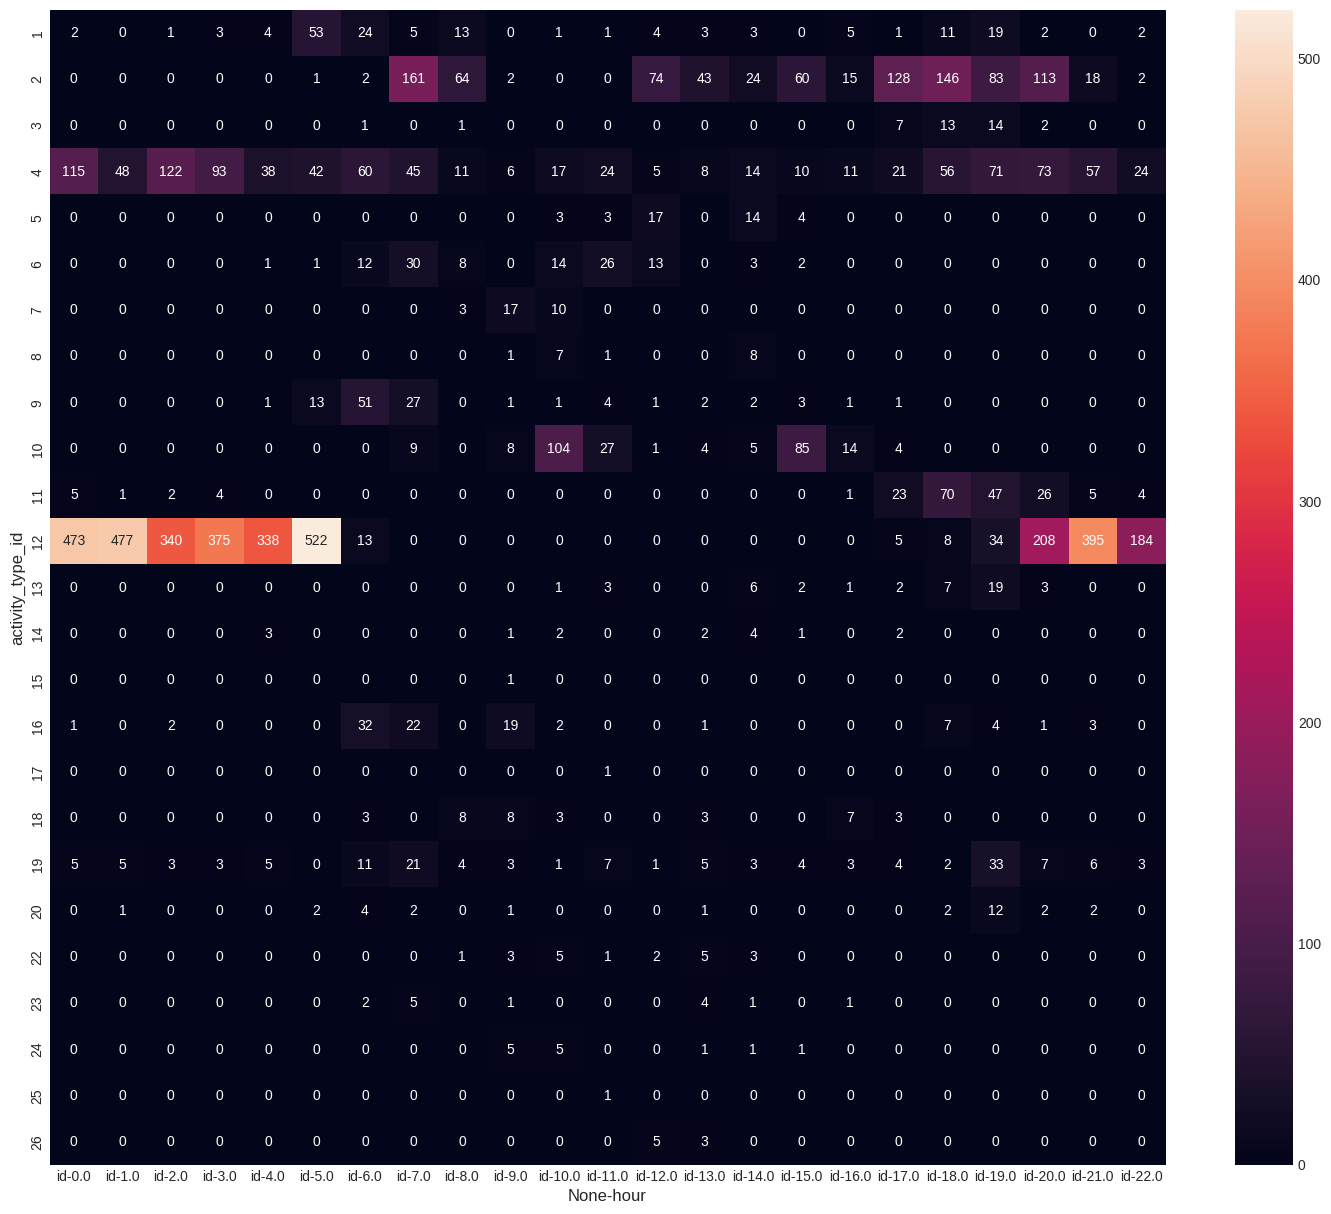

In [43]:
import seaborn as sns
mpl.style.use("seaborn-darkgrid")
df_care["hour"] = df_care["year-month-date-hour"].str.split("-", expand=True).iloc[:, -1].astype(float)
corr = df_care.groupby(["activity_type_id", "hour"]).count().iloc[:, 0].reset_index().sort_values(["activity_type_id", "hour"]).pivot("activity_type_id", "hour").fillna(0).astype(int)
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, fmt='d');
plt.savefig("../results/test/activity_hour_heatmap.png")

In [9]:
df_submission = pd.read_csv("../TestSubmission/test8.csv")

In [11]:
pd.set_option("display.max_columns", 25)
df_submission

,year-month-date-hour,1,2,3,4,5,7,8,9,10,11,12,13,14,16,18,19,20,21,22,23,24
0,2018-05-25-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-05-26-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-05-27-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-05-28-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-05-30-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2018-05-31-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2018-06-02-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2018-06-03-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2018-06-04-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2018-06-05-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
